In [15]:
# Question 1

import csv
import pandas as pd

def get_max_win(df):
    df = df.sort_values(by='W', ascending=False)
    return df.iloc[0]

dataFileName = 'pitching.csv'
yearIDs = range(2011, 2016)
lgIDs = ['AL', 'NL']

# Read the data into a data frame.
pitchingDataFrame = pd.read_csv(dataFileName)

# Display all pitchers in 2015 under each team sorted by their last names.
pitchingDataFrame2015 = pitchingDataFrame[pitchingDataFrame.yearID == 2015]
print(pitchingDataFrame2015.sort_values(['teamID', 'nameLast']).loc[:, ['teamID', 'nameLast', 'nameGiven']])
# Display all pitchers in 2015 sorted by their ERAs. This allows you to identify the best and worst pitchers.
print(pitchingDataFrame2015.sort_values(['ERA']).loc[:, ['teamID', 'ERA', 'nameGiven']])
# Display all pitchers in 2015 under each team sorted by their ERAs.
print(pitchingDataFrame2015.sort_values(['teamID', 'ERA']).loc[:, ['teamID', 'ERA', 'nameGiven']])
# Display all pitchers in 2015 under each team sorted by their strike outs
print(pitchingDataFrame2015.sort_values(['teamID', 'SO']).loc[:, ['teamID', 'SO', 'nameGiven']])

# Calculate the average ERA for each team, list the teams by the average ERA in a descending order.
pitchingDataFrameGroup = pitchingDataFrame.groupby(['teamID'], as_index=False)
print(pitchingDataFrameGroup.agg('mean').loc[:, ['teamID', 'ERA']].sort_values(by='ERA', ascending=False))
# Calculate the total number of home runs allowed (HRs) for each team, and list the team by the count in an ascending order.
print(pitchingDataFrameGroup.agg('sum').loc[:, ['teamID', 'HR']].sort_values(by='HR', ascending=True))

# Calculate each team’s average ERA from 2011 to 2015,and list the result as a table, where each column is a year, each row is a team.
pitchingDataFramePeriod = pitchingDataFrame[pitchingDataFrame.yearID.isin(yearIDs)].groupby(['yearID', 'teamID'], as_index=False)
pitchingDataFramePeriod = pitchingDataFramePeriod.agg('mean').loc[:, ['teamID', 'yearID', 'ERA']].pivot(index='teamID', columns='yearID')
print(pitchingDataFramePeriod)

# Calculate the average ERAs for American League (AL) and National League (NL) from 2011 to 2015, and list the result as a table, where each column is a league and each row is a year.
pitchingDataFrameLG = pitchingDataFrame[pitchingDataFrame.lgID.isin(lgIDs) & pitchingDataFrame.yearID.isin(yearIDs)]
pitchingDataFrameLG = pitchingDataFrameLG.groupby(['yearID', 'lgID'], as_index=False).agg('mean').loc[:, ['lgID', 'yearID', 'ERA']].pivot(index='yearID', columns='lgID')
print(pitchingDataFrameLG)

# List the pitchers who had the most wins in each of the years from 2011 to 2015.
pitchingDataFramePlayer = pitchingDataFrame[pitchingDataFrame.yearID.isin(yearIDs)].sort_values(by=['yearID', 'W']).groupby('yearID').apply(get_max_win).loc[:, ['nameGiven', 'W']]
print(pitchingDataFramePlayer)


range(2011, 2016)
      teamID    nameLast      nameGiven
863      ARI    Anderson   Robert Chase
4073     ARI      Bracho        Silvino
4074     ARI     Bradley      Archie N.
5339     ARI      Burgos        Enrique
6516     ARI      Chacin   Jhoulys Jose
...      ...         ...            ...
38518    WAS      Storen   Drew Patrick
38520    WAS   Strasburg  Stephen James
39683    WAS    Thornton     Matthew J.
40225    WAS     Treinen       Blake M.
44136    WAS  Zimmermann      Jordan M.

[809 rows x 3 columns]
      teamID   ERA            nameGiven
9710     CHN   0.0  Christopher Anthony
3491     NYN   0.0        Jerry Richard
34863    NYA   0.0         Brendan Wood
9186     OAK   0.0       Isaac Benjamin
7636     KCA   0.0         Harold Louis
...      ...   ...                  ...
8206     ATL  36.0         John Francis
4987     NYA  54.0         Daniel James
27583    NYN  67.5             Akeel J.
34372    COL  90.0       Jorge Leonardo
14772    SLN   NaN     Nicholas Richar

   teamID    W
26    SLN  465
18    NYA  448
14    LAN  446
30    WAS  443
9     DET  440
13    LAA  436
28    TEX  435
22    PIT  431
27    TBA  430
25    SFN  428
1     ATL  425
2     BAL  424
20    OAK  420
12    KCA  413
6     CIN  406
7     CLE  406
3     BOS  405
29    TOR  404
16    MIL  403
0     ARI  399
19    NYN  394
21    PHI  392
24    SEA  376
4     CHA  376
23    SDN  374
5     CHN  368
17    MIN  348
8     COL  345
11    HOU  318
15    MIA  279
10    FLO   72
   teamID        salary
18    NYA  7.638713e+06
21    PHI  5.721195e+06
14    LAN  5.642426e+06
9     DET  5.513730e+06
3     BOS  5.184631e+06
25    SFN  5.056022e+06
13    LAA  4.835898e+06
28    TEX  4.265301e+06
4     CHA  4.114336e+06
26    SLN  3.926359e+06
30    WAS  3.865897e+06
5     CHN  3.801728e+06
17    MIN  3.593669e+06
29    TOR  3.564357e+06
6     CIN  3.533832e+06
24    SEA  3.519141e+06
2     BAL  3.443053e+06
16    MIL  3.389451e+06
1     ATL  3.322769e+06
19    NYN  3.128360e+06
8     COL  3.088

<AxesSubplot: >

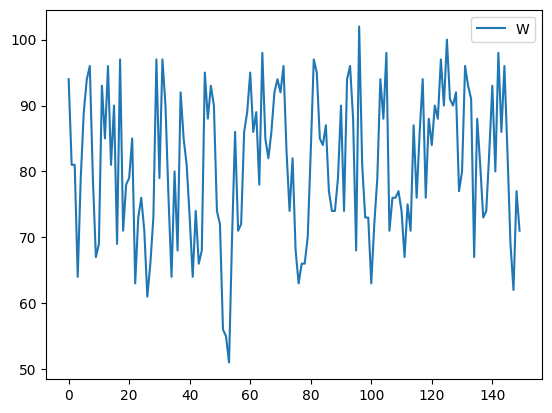

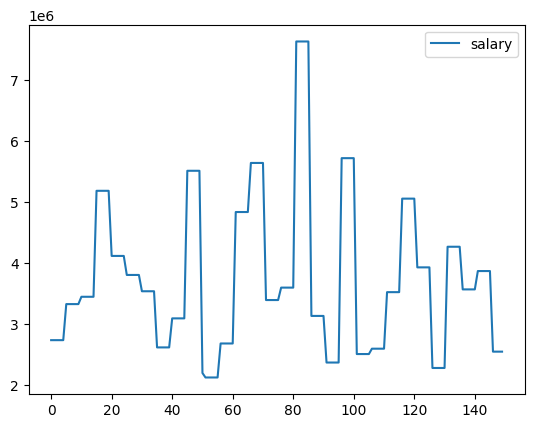

In [23]:
# Question 2 - 1

import pandas as pd

teamFileName = 'teams.csv'
playerFileName = 'players.csv'
yearIDs = range(2011, 2016)

# Compute the total number of wins for each of the teams in MLB over 2011-2015, sort them in a descending order.
teamDataFrame = pd.read_csv(teamFileName)
teamDataFrame = teamDataFrame[teamDataFrame.yearID.isin(yearIDs)].loc[:, ['teamID', 'W']]
teamDataFrameForW = teamDataFrame.groupby(['teamID'], as_index=False).agg('sum').loc[:, ['teamID', 'W']]
teamDataFrameForW = teamDataFrameForW.sort_values(by=['W'], ascending=[False])
print(teamDataFrameForW)

# Compute the average payroll per year for all teams over 2011-2015,sort them in a descending order.
playerDataFrame = pd.read_csv(playerFileName)
playerDataFrame = playerDataFrame[playerDataFrame.yearID.isin(yearIDs)].loc[:, ['teamID', 'salary']]
playerDataFrame = playerDataFrame.groupby(['teamID'], as_index=False).agg('mean').sort_values(by=['salary'], ascending=[False])
print(playerDataFrame)


# Create a visualization of your choice which will all allow you to show whether a team’s winning record is related to its payroll. So is a team’s winning record related to its payroll?
# Ans: The answer as the graph show is yes
teamDataFrame = pd.merge(teamDataFrame, playerDataFrame)
teamDataFrame.loc[:, ['W']].plot()
teamDataFrame.loc[:, ['salary']].plot()

   teamID     H     AB        BA
9     DET  7704  28009  0.275054
8     COL  7496  27904  0.268635
28    TEX  7409  27805  0.266463
12    KCA  7448  27977  0.266219
3     BOS  7475  28156  0.265485
26    SLN  7290  27621  0.263930
13    LAA  7183  27706  0.259258
25    SFN  7161  27684  0.258669
14    LAN  7033  27310  0.257525
0     ARI  7114  27760  0.256268
16    MIL  6989  27420  0.254887
29    TOR  7043  27641  0.254803
2     BAL  7073  27846  0.254004
18    NYA  6981  27555  0.253348
7     CLE  6962  27513  0.253044
30    WAS  6918  27462  0.251912
4     CHA  6962  27659  0.251708
22    PIT  6882  27486  0.250382
17    MIN  6912  27647  0.250009
21    PHI  6908  27711  0.249287
6     CIN  6849  27554  0.248566
27    TBA  6782  27373  0.247762
15    MIA  5403  21887  0.246859
19    NYN  6809  27608  0.246631
10    FLO  1358   5508  0.246550
20    OAK  6807  27645  0.246229
1     ATL  6717  27282  0.246206
11    HOU  6705  27368  0.244994
5     CHN  6683  27457  0.243399
23    SDN 

<AxesSubplot: >

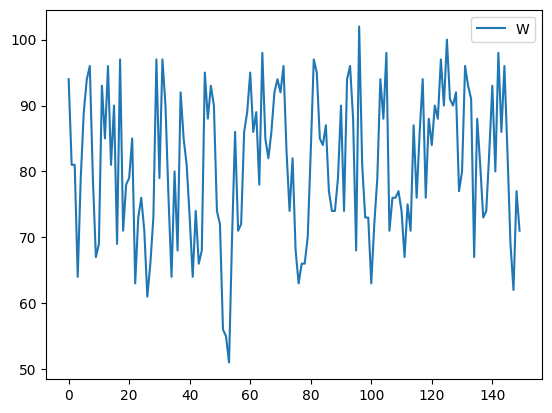

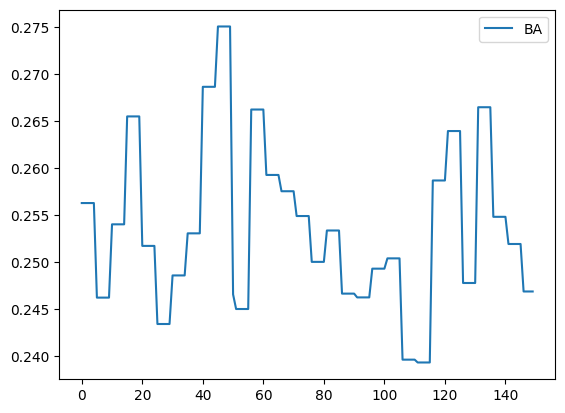

In [26]:
# Question 2 - 2

import pandas as pd

teamFileName = 'teams.csv'
playerFileName = 'players.csv'
yearIDs = range(2011, 2016)

teamDataFrame = pd.read_csv(teamFileName)
teamDataFrame = teamDataFrame[teamDataFrame.yearID.isin(yearIDs)].loc[:, ['teamID', 'W']]
teamDataFrameForW = teamDataFrame.groupby(['teamID'], as_index=False).agg('sum').loc[:, ['teamID', 'W']]
teamDataFrameForW = teamDataFrameForW.sort_values(by=['W'], ascending=[False])

# Compute the Batting Averages for each of the MLB teams over 2011-2015, sort them in a descending order. The Batting Average is defined as Hits/At Bats.
# The average is calculated from all players in each team.
playerDataFrame = pd.read_csv(playerFileName)
playerDataFrame = playerDataFrame[playerDataFrame.yearID.isin(yearIDs)].loc[:, ['teamID', 'H', 'AB']]
playerDataFrame = playerDataFrame.groupby(['teamID'], as_index=False).agg('sum')
playerDataFrame['BA'] = playerDataFrame['H'] / playerDataFrame['AB']
playerDataFrame = playerDataFrame.sort_values(by=['BA'], ascending=[False])
print(playerDataFrame)

# Create a visualization of your choice which will allow you to decide whether a team’s batting average is related to its win-loss record.
# So is a team’s winning record related to its batting average?
# Ans: The answer as the graph show is yes but not all, sometimes it has relation, sometime is not
teamDataFrame = pd.merge(teamDataFrame, playerDataFrame)
teamDataFrame.loc[:, ['W']].plot()
teamDataFrame.loc[:, ['BA']].plot()

   teamID    ERA
8     COL  4.794
17    MIN  4.508
11    HOU  4.308
3     BOS  4.202
29    TOR  4.202
2     BAL  4.094
4     CHA  4.074
28    TEX  4.026
5     CHN  4.022
7     CLE  4.012
9     DET  4.010
0     ARI  3.990
10    FLO  3.950
21    PHI  3.930
16    MIL  3.928
15    MIA  3.900
12    KCA  3.886
13    LAA  3.868
24    SEA  3.860
18    NYA  3.858
19    NYN  3.794
6     CIN  3.760
23    SDN  3.754
20    OAK  3.622
25    SFN  3.620
1     ATL  3.574
22    PIT  3.568
27    TBA  3.562
26    SLN  3.462
30    WAS  3.430
14    LAN  3.394


<AxesSubplot: >

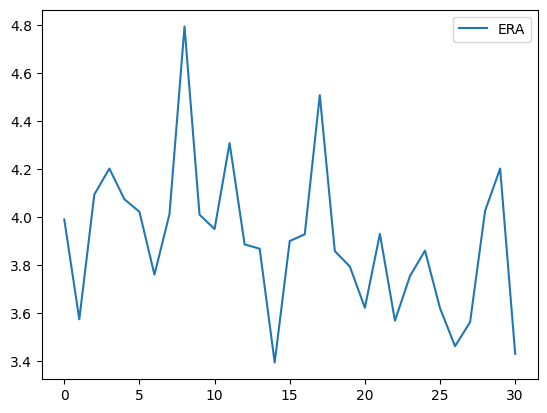

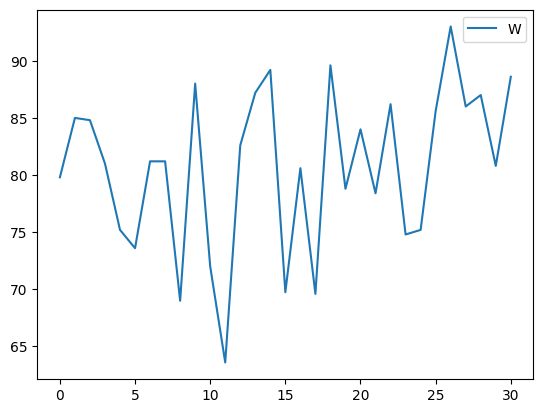

In [25]:
# Question 2 - 3

import pandas as pd

teamFileName = 'teams.csv'
yearIDs = range(2011, 2016)

teamDataFrame = pd.read_csv(teamFileName)
teamDataFrame = teamDataFrame[teamDataFrame.yearID.isin(yearIDs)]
teamDataFrameForW = teamDataFrame.loc[:, ['teamID', 'W']]
teamDataFrameForW = teamDataFrameForW.groupby(['teamID'], as_index=False).agg('mean').loc[:, ['teamID', 'W']]


# Display the average ERA (Earned Run Average) for each of the MLB teams in 2011-2015,
# sort them in a descending order. A lower ERA indicates a better pitching performance.
teamDataFrameForERA = teamDataFrame.loc[:, ['teamID', 'ERA']]
teamDataFrameForERA = teamDataFrameForERA.groupby(['teamID'], as_index=False).agg('mean').sort_values(by='ERA', ascending=False)
print(teamDataFrameForERA)

# Create a visualization of your choice which will allow you to decide if a team’s win-loss record is related to its pitching performance.
# So is a team’s winning record related to its pitching performance?
# Ans: The answer as the graph show is Yes.
teamDataFrame = pd.merge(teamDataFrameForW, teamDataFrameForERA)
teamDataFrame.loc[:, ['ERA']].plot()
teamDataFrame.loc[:, ['W']].plot()